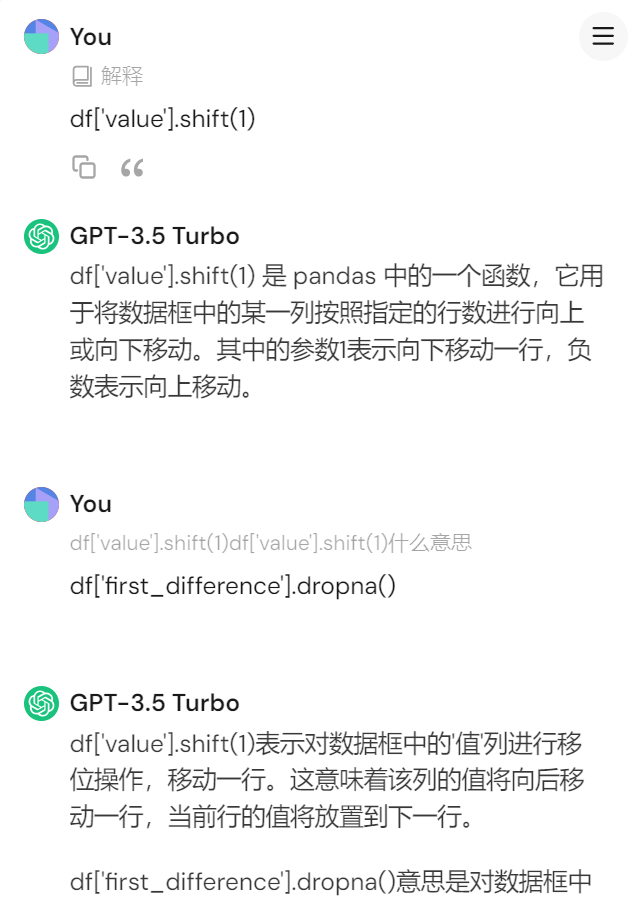
## ARIMA(p,d,q)  
### AR(p)自回归模型  
$$Y_t=c+\varphi_1Y_{t-1}+\varphi_2Y_{t-2}+\ldots+\varphi_pY_{t-p}+\xi_t\\
Y_t——在时间t的观察值\\
c——常数\\
\phi_t——自回归系数\\
\xi_t——误差项\\
p——在预测当前时刻的值时，将考虑过去多少个时刻的值$$  
一个时间点的标签值可以由其过去某个时间段内的所有标签值的线性组合表示。这个线性组合可以理解为对过去信息的加权求和，每个过去时间点的信息都通过一个相应的权重（在AR模型中，这个权重是模型参数）来反映其对当前时间点的影响  
* 给定时间点的标签值受到其过去的标签值的显著影响 
* 时间点之间的距离越远，他们之间的关联性越弱

### MA(q)移动平均模型  
$$Y_t=\mu+\epsilon_t+\theta_1\epsilon_{t-1}+\theta_2\epsilon_{t-2}+\cdots+\theta_q\epsilon_{t-q} \\
\mu——时间序列的均值或期望值，这个值对所有的时间点都是相同的\\
\epsilon_t——白噪声项，每个时间点的值都是独立同分布的，通常假设为正态分布，均值为0，方差为\sigma^2\\
\theta_t——对应的白噪声对当前时间点的影响程度\\
q——型中包含的过去白噪声项的数量$$  
大部分时候时间序列应当是相对稳定的。在稳定的基础上，每个时间点上的标签值受过去一段时间内、不可预料的各种偶然事件影响而波动  
* 平稳性：MA模型假设时间序列是平稳的，长期内保持稳定的行为，而在短期内可能会受到随机因素的影响  
* 存在一个白噪声序列。是随机误差项，均值为0，方差为常数，且各个时间点上的值相互独立  
* 时间序列可以被过去的白噪声项的线性组合表示

### I差分  
用于计算一组数值序列中相邻数据点的差值。在时间序列分析中，差分常用于将非平稳序列转化为平稳序列，也就是减小或消除时间序列的趋势和季节性变化  
* （n阶）差分  
    连续进行n次一阶差分（比较每个观察值与其前一步的观察值）
* 滞后（n阶）差分  
    比较每个观察值与其前n步的观察值  
$$B^ny_t=y_{t-n}\\
y_t滞后n个时间步长\\
滞后运算表示d阶差分\\
d\_order\_y=(1-B)^dy_t$$  
```python
# 一阶差分的计算
# 将'value'列向下移动1行（向上移动为负）
df['first_difference'] = df['value'] - df['value'].shift(1)
# 删除'first_difference'列中的缺失值
df['first_difference'].dropna()
```

### 时序数据的平稳性  
统计特性（如均值，方差）在时间上是常数或不会随时间变化  
#### ACF自相关函数  
时间点t和t+k观察值的相关性  
当 ACF 接近 1 时，表示两个时间点的观测值高度正相关；当 ACF 接近 -1 时，表示两个时间点的观测值高度负相关；当 ACF 接近 0 时，表示两个时间点的观测值之间的相关性较弱
$$\rho(k)=Cov(X_t,X_{t+k})/Var(X_t)$$  
#### PACF偏自相关函数  
两个观测值之间的相关性，去掉其他滞后观测值的影响  
当 PACF 接近 1 时，表示两个时间点的观测值高度正相关；当 PACF 接近 -1 时，表示两个时间点的观测值高度负相关；当 PACF 接近 0 时，表示两个时间点的观测值之间的直接相关性较弱  
$$\begin{gathered}\varphi(k)=Cov(X_t-E[X_t|X_{t-1},\ldots,X_{t-k+1}],X_{t-k}-E[X_{t-k}|X_{t-k+1},\ldots,X_{t-1}])/Var(X_t)\end{gathered}$$